# Global AI, ML, Data Science Salaries Analysis

## 1. Data Collection

In [1]:
import kaggle
!kaggle datasets download -d msjahid/global-ai-ml-and-data-science-salaries

Dataset URL: https://www.kaggle.com/datasets/msjahid/global-ai-ml-and-data-science-salaries
License(s): CC0-1.0
100%|█████████████████████████████████████████| 216k/216k [00:00<00:00, 585kB/s]
100%|█████████████████████████████████████████| 216k/216k [00:00<00:00, 584kB/s]


In [2]:
import zipfile
zipfile_name = 'global-ai-ml-and-data-science-salaries.zip'
with zipfile.ZipFile(zipfile_name, 'r') as file:
    file.extractall()

## 2. Data Cleaning

In [97]:
import pandas as pd
df = pd.read_csv('global_ai_ml_data_salaries.csv')

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34422 entries, 0 to 34421
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           34422 non-null  int64 
 1   experience_level    34422 non-null  object
 2   employment_type     34422 non-null  object
 3   job_title           34422 non-null  object
 4   salary              34422 non-null  int64 
 5   salary_currency     34422 non-null  object
 6   salary_in_usd       34422 non-null  int64 
 7   employee_residence  34422 non-null  object
 8   remote_ratio        34422 non-null  int64 
 9   company_location    34422 non-null  object
 10  company_size        34422 non-null  object
dtypes: int64(4), object(7)
memory usage: 2.9+ MB


In [91]:
# Verify null data
df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

Observation:  
There is no null data.

In [92]:
# Verify duplicated data
df.duplicated().sum()

np.int64(16646)

Observation:  
There are 16646 duplicates, but the duplicates are valid because it is possible to have exactly the same data but they are different cases. No action is required.

In [93]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2024,EN,FT,Data Analyst,170186,USD,170186,US,0,US,M
1,2024,EN,FT,Data Analyst,170186,USD,170186,US,0,US,M
2,2024,MI,FT,Data Engineer,161000,USD,161000,US,0,US,M
3,2024,MI,FT,Data Engineer,119000,USD,119000,US,0,US,M
4,2024,MI,FT,Data Scientist,170186,USD,170186,US,0,US,M


In [98]:
# Update data in abbreviation / numbering code to verbal string

experience_level_dict = {
    'EN': 'Entry-level / Junior',
    'MI': 'Mid-level / Intermediate',
    'SE': 'Senior-level / Expert',
    'EX': 'Executive-level / Director' 
}

employment_type_dict = {
    'PT': 'Part-time',
    'FT': 'Full-time',
    'CT': 'Contract',
    'FL': 'Freelance'
}

remote_ratio_dict = {
    0: 'No remote work',
    1: 'Partially remote / hybrid',
    100: 'Fully remote'
}

company_size_dict = {
    'S': 'less than 50 employees',
    'M': '50 to 250 employees',
    'L': 'more than 250 employees'
}

df.experience_level = df.experience_level.map(experience_level_dict)
df.employment_type = df.employment_type.map(employment_type_dict)
df.remote_ratio = df.remote_ratio.map(remote_ratio_dict)
df.company_size = df.company_size.map(company_size_dict)

df['work_year'] = pd.to_datetime(df['work_year'], format='%Y').dt.year

In [99]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2024,Entry-level / Junior,Full-time,Data Analyst,170186,USD,170186,US,No remote work,US,50 to 250 employees
1,2024,Entry-level / Junior,Full-time,Data Analyst,170186,USD,170186,US,No remote work,US,50 to 250 employees
2,2024,Mid-level / Intermediate,Full-time,Data Engineer,161000,USD,161000,US,No remote work,US,50 to 250 employees
3,2024,Mid-level / Intermediate,Full-time,Data Engineer,119000,USD,119000,US,No remote work,US,50 to 250 employees
4,2024,Mid-level / Intermediate,Full-time,Data Scientist,170186,USD,170186,US,No remote work,US,50 to 250 employees


In [143]:
df.nunique()

work_year                5
experience_level         4
employment_type          4
job_title              211
salary                4234
salary_currency         24
salary_in_usd         4667
employee_residence      91
remote_ratio             2
company_location        80
company_size             3
dtype: int64

## 3. Data Exploration

In [104]:
# Identify numerical and categorical columns
numerical_col = ['salary_in_usd']
categorical_col = ['experience_level', 'employment_type', 'job_title', 
                   'employee_residence', 'remote_ratio', 'company_location', 'company_size']

In [102]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 3.1. Univariate Analysis

#### 3.1.1. Distribution of numerical variables

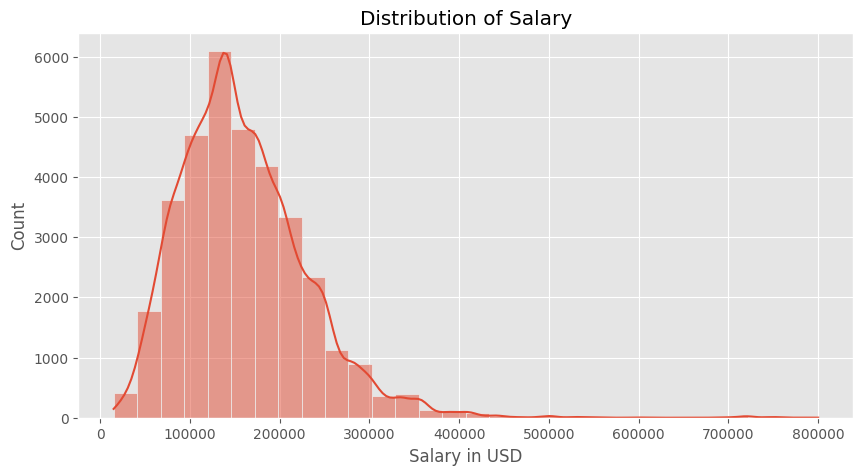

In [103]:
plt.figure(figsize=(10,5))
sns.histplot(df['salary_in_usd'], kde=True, bins=30)
plt.title('Distribution of Salary')
plt.xlabel('Salary in USD')
plt.ylabel('Count')
plt.style.use('ggplot')
plt.show()

In [55]:
# Calculate salary mean, median, and mode
mean = df.salary_in_usd.mean()
median = df.salary_in_usd.median()
mode = df.salary_in_usd.mode()

print("mean: ", mean)
print("median: ", median)
print("mode: ", mode)

mean:  159188.4298704317
median:  149800.0
mode:  0    150000
Name: salary_in_usd, dtype: int64


Observation:  
The salary distribution is right skewed.

#### 3.1.2. Count plots for categorical variables

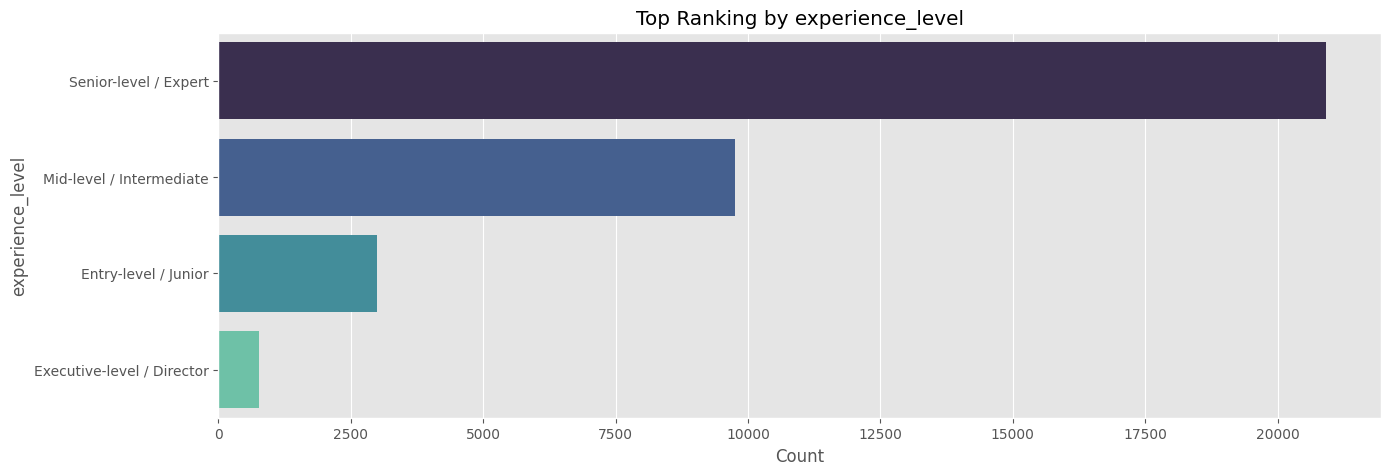

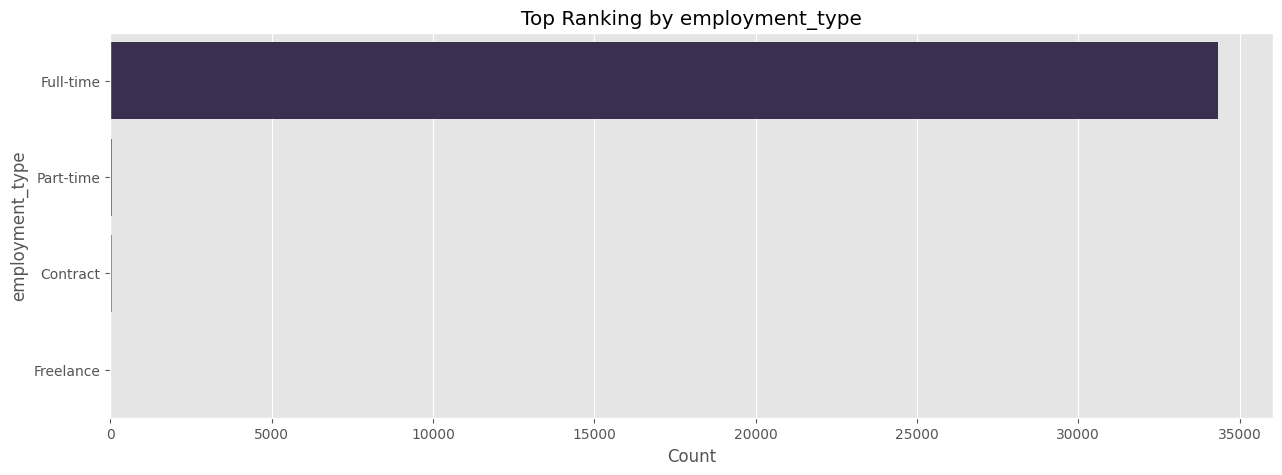

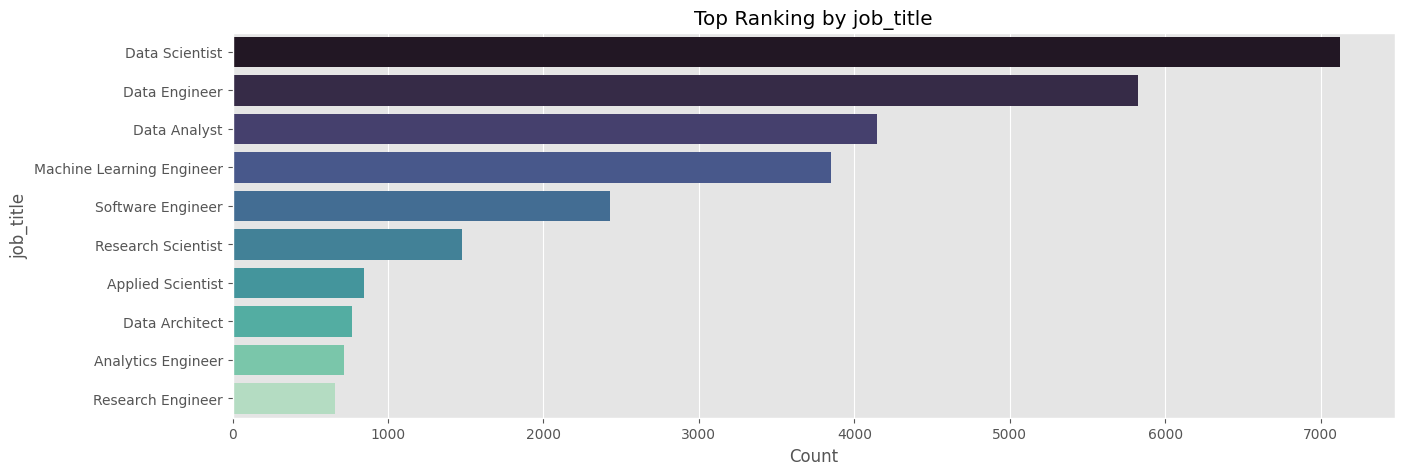

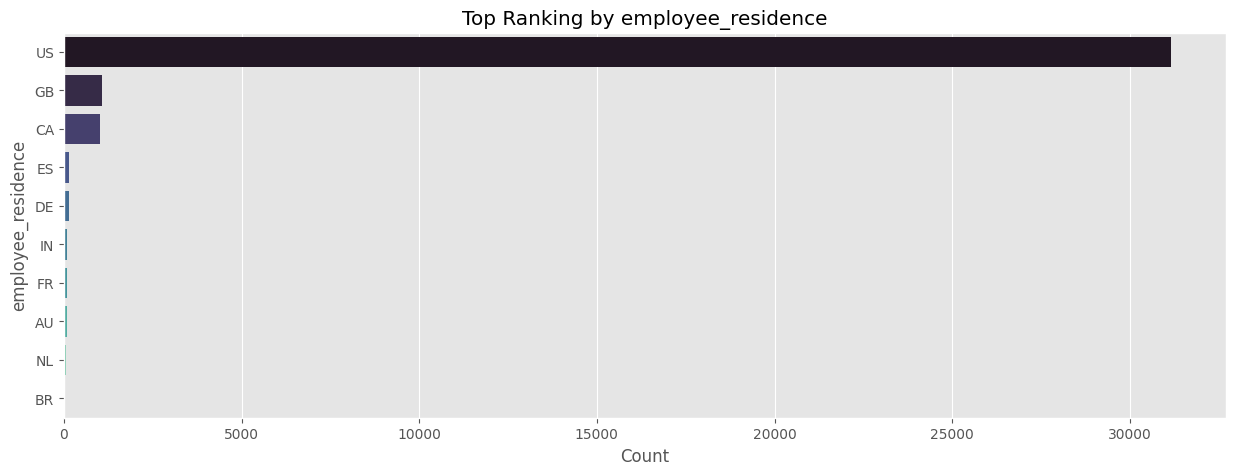

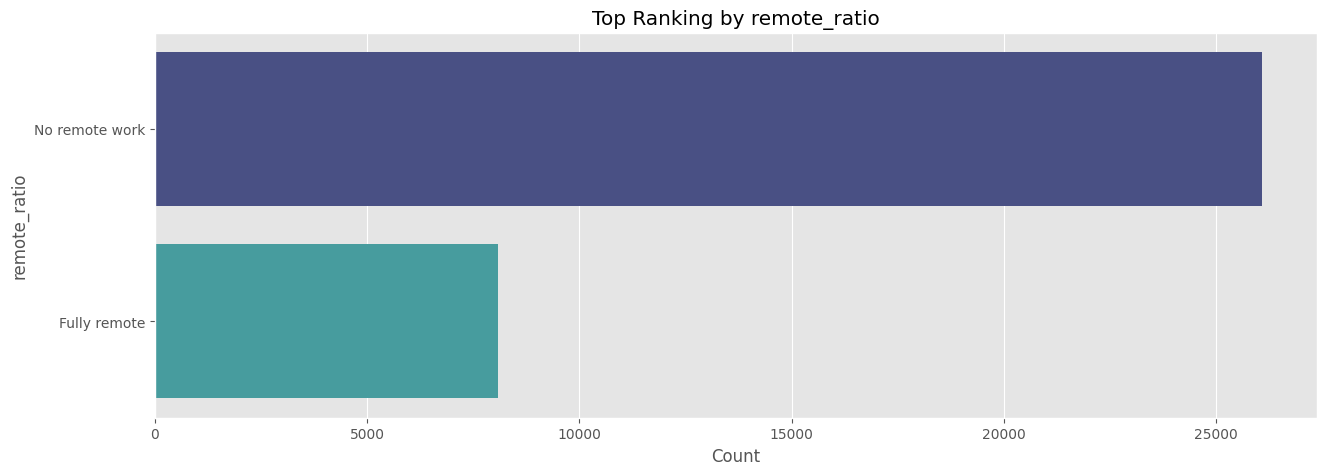

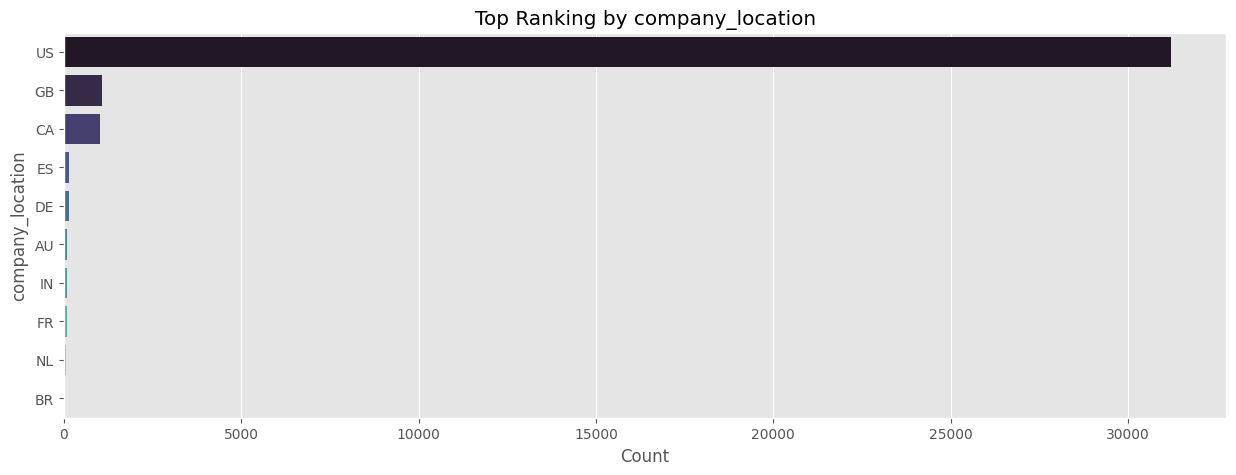

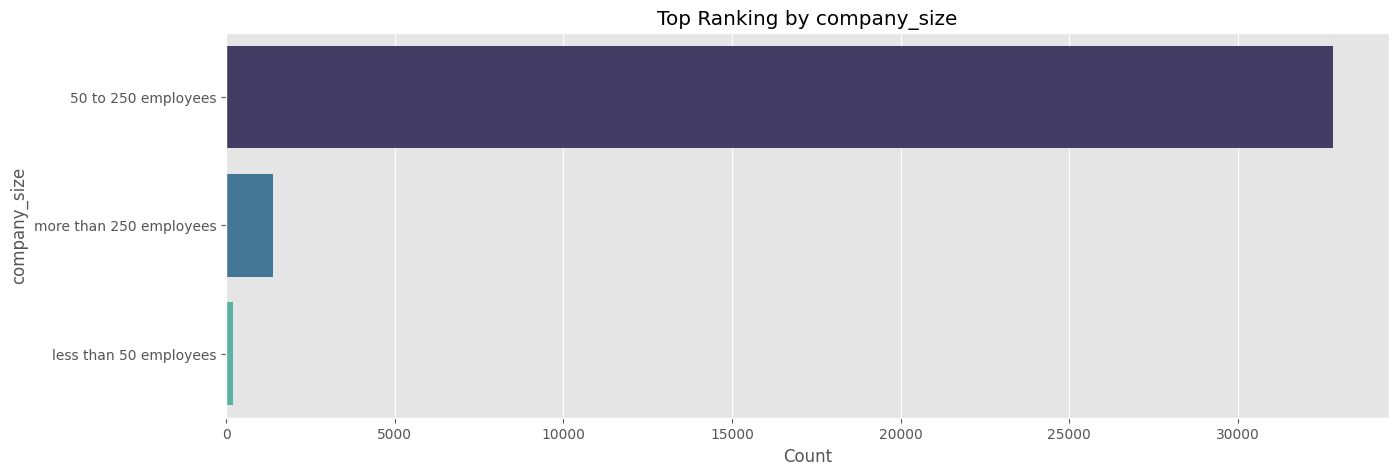

In [129]:
plt.style.use('ggplot')

for col in categorical_col:
    top_10 = df[col].value_counts().nlargest(10)
    plt.figure(figsize=(15, 5))
    sns.barplot(x=top_10.values, y=top_10.index, palette='mako', hue=top_10.index, legend=False)
    plt.title(f'Top Ranking by {col}')
    plt.xlabel('Count')
    plt.ylabel(col)
    plt.show()

### 3.2. Bivariate Analysis

#### 3.2.1. Box plots for categorical variables vs. numerical variable

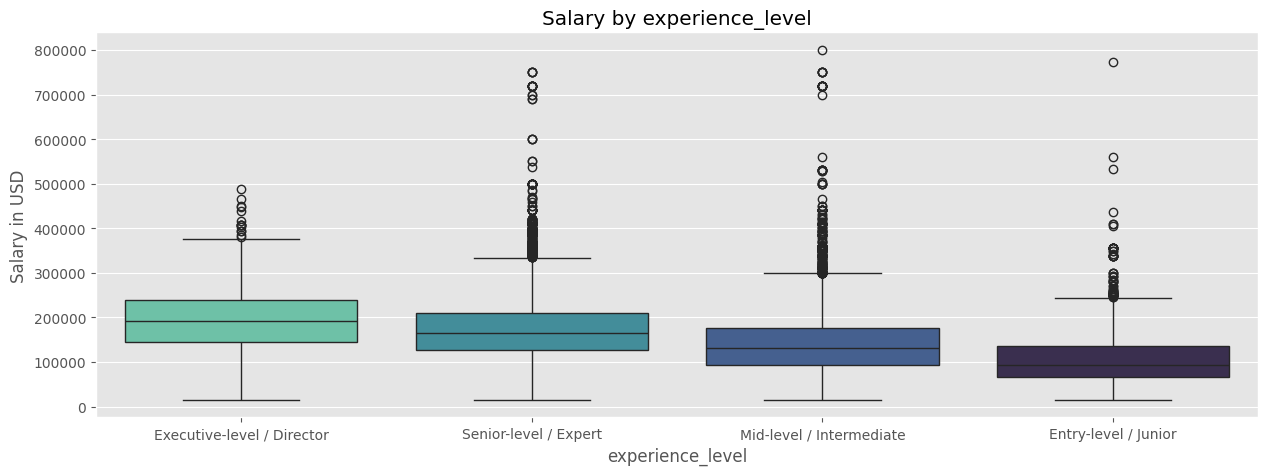

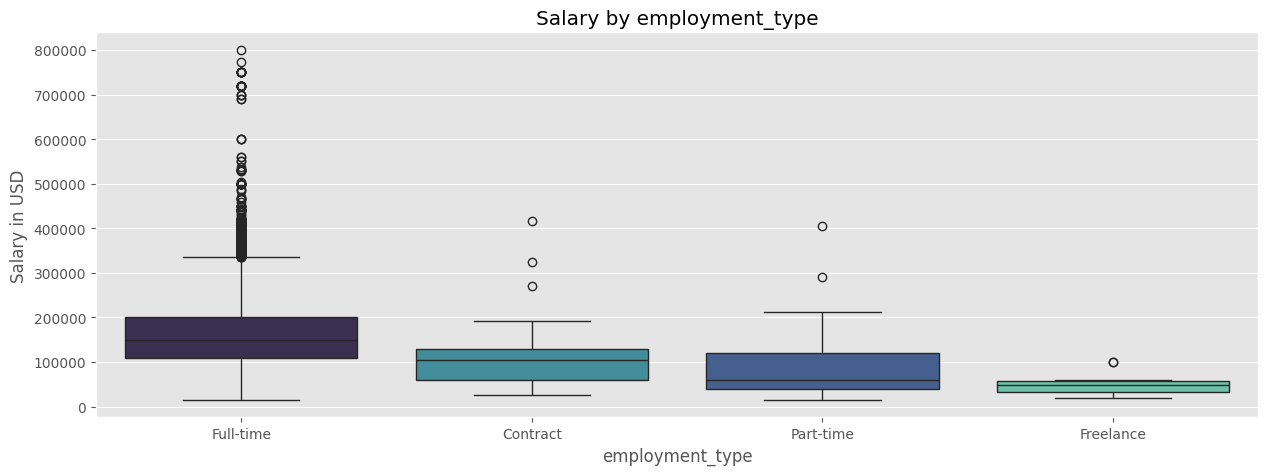

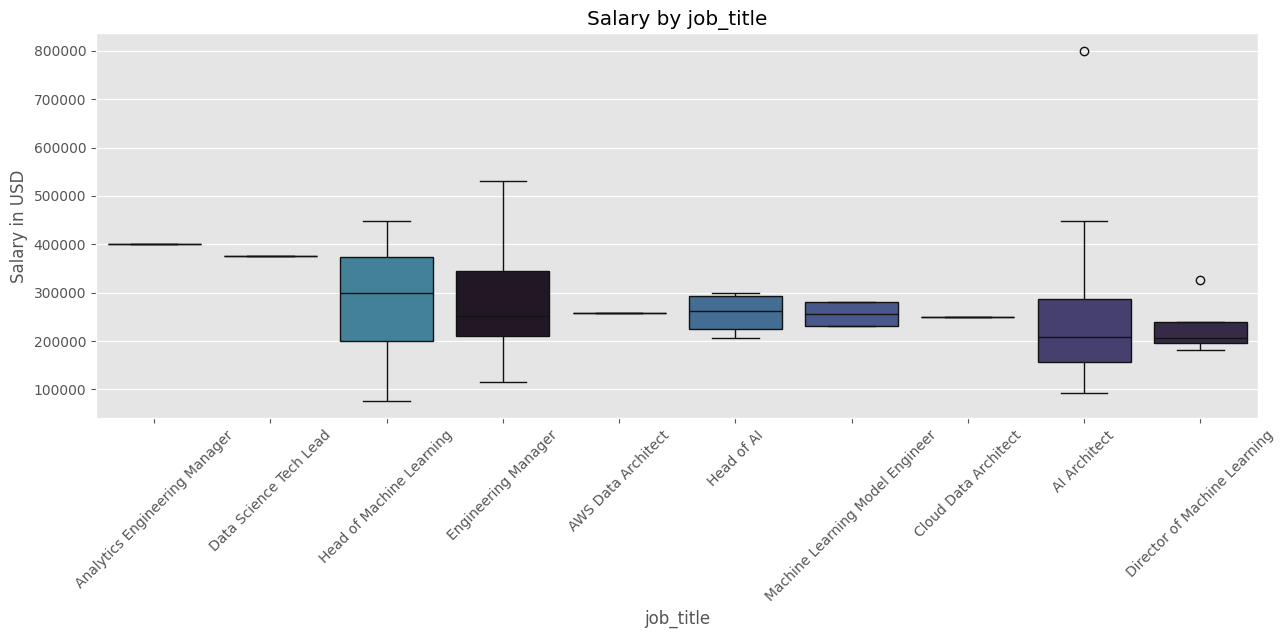

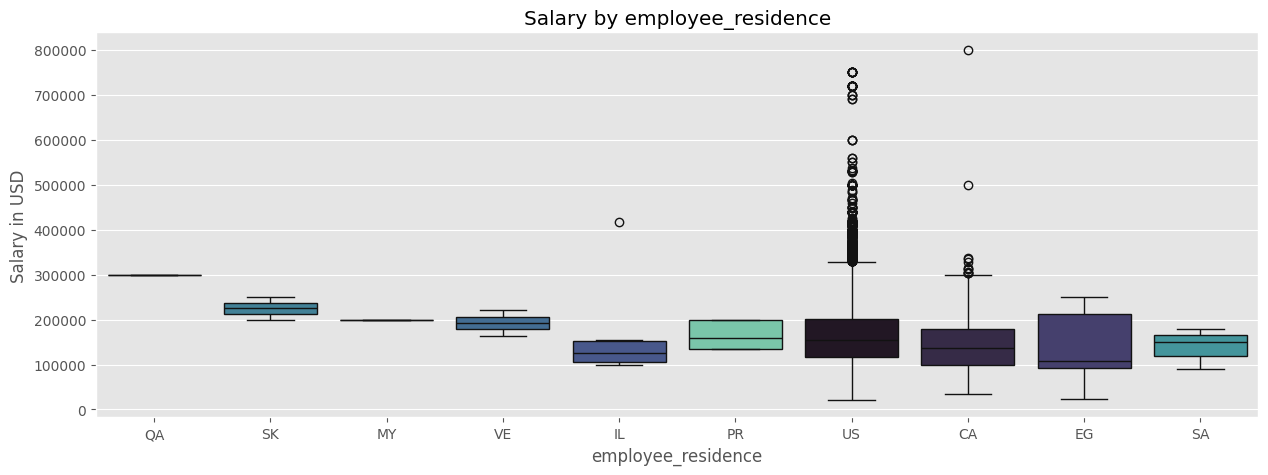

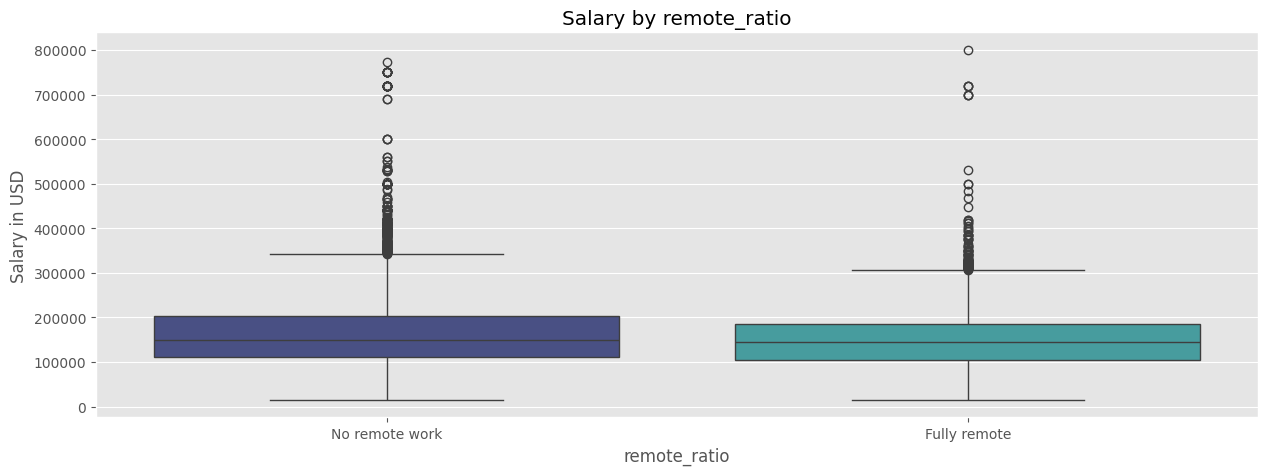

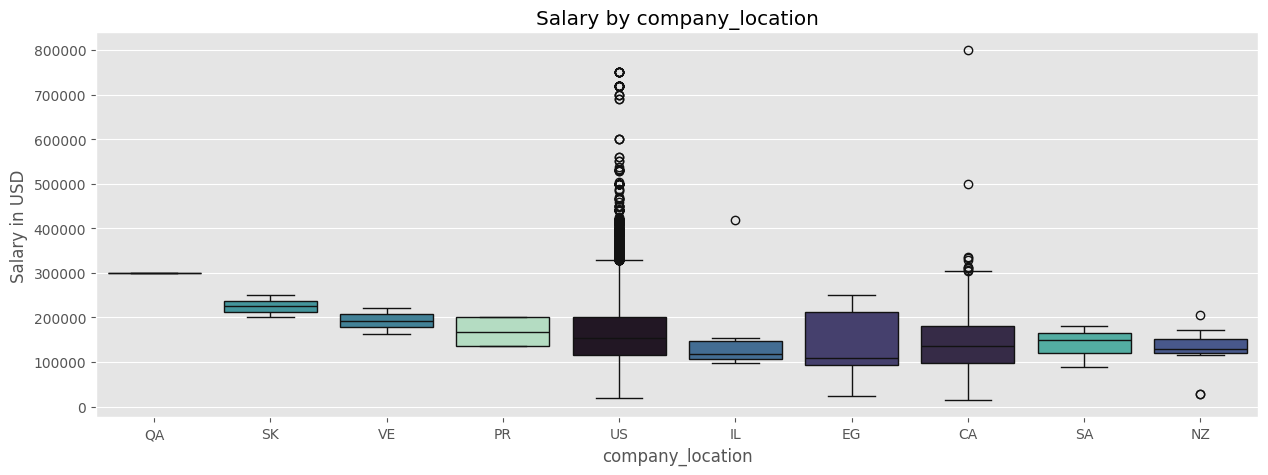

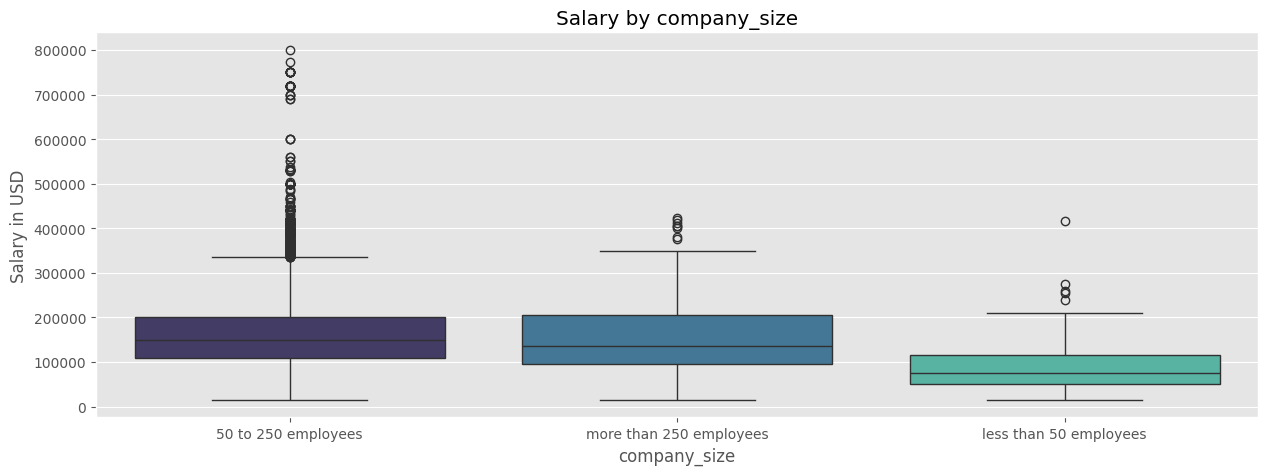

In [171]:
plt.style.use('ggplot')

for col in categorical_col:
    top_10 = df.groupby([col])['salary_in_usd'].mean().nlargest(10).index
    df_top_10 = df[df[col].isin(top_10)]
    plt.figure(figsize=(15, 5))
    sns.boxplot(x=df_top_10[col], y=df_top_10['salary_in_usd'], order=top_10, palette='mako', hue=df_top_10[col], legend=False)
    plt.title(f'Salary by {col}')
    plt.xlabel(col)
    plt.ylabel('Salary in USD')
    if col == 'job_title':
        plt.xticks(rotation=45)
    plt.show()

### 3.3. Time Series Analysis

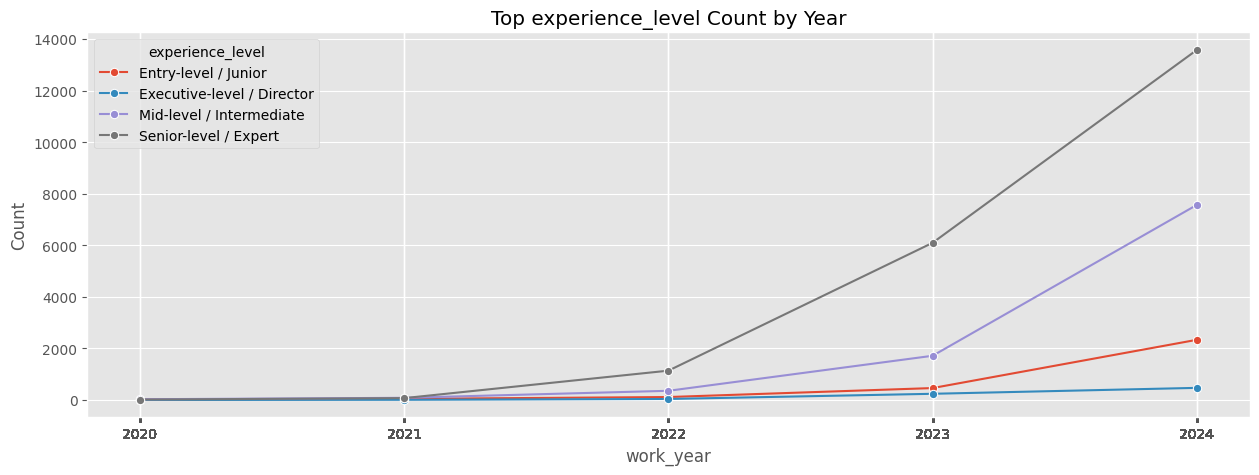

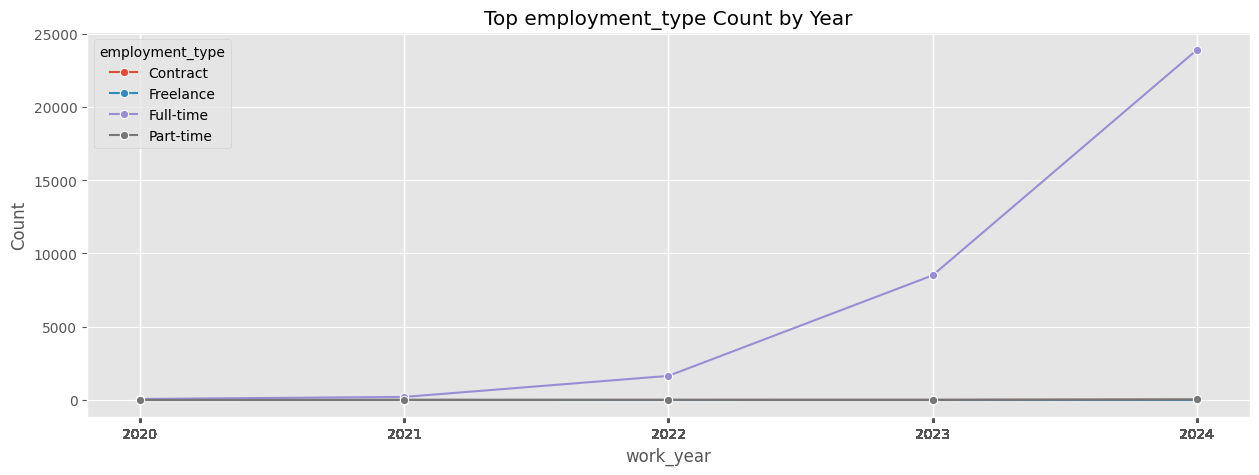

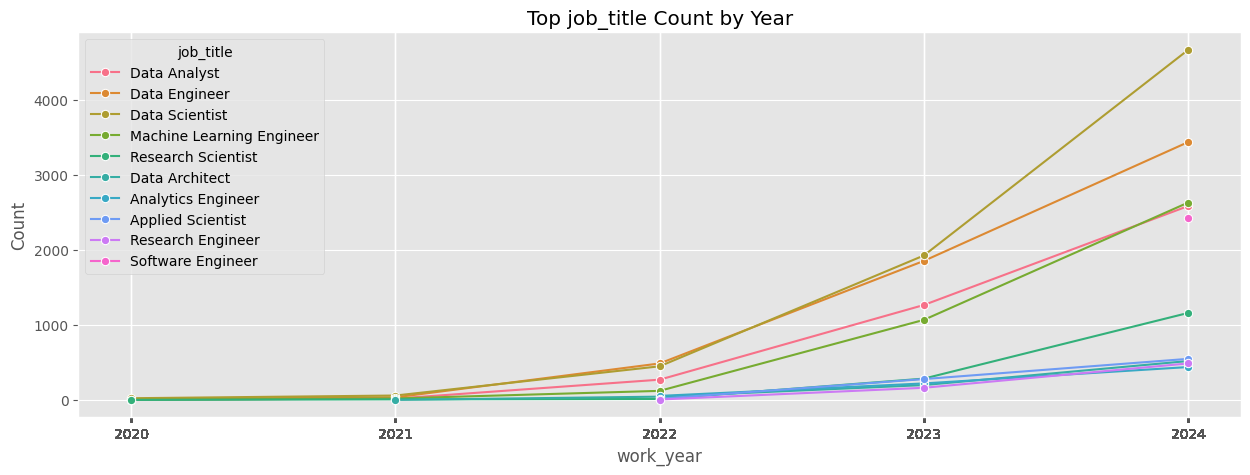

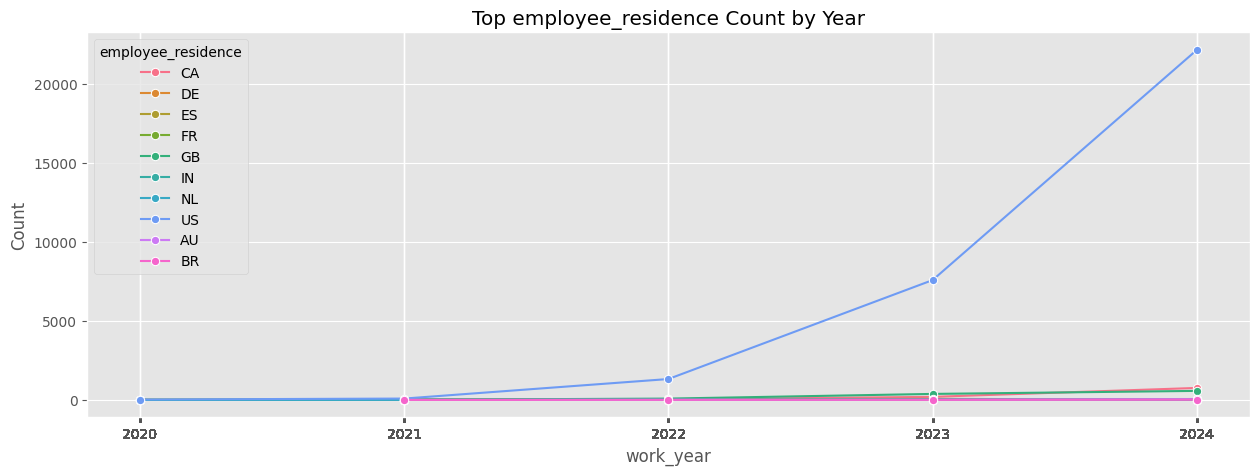

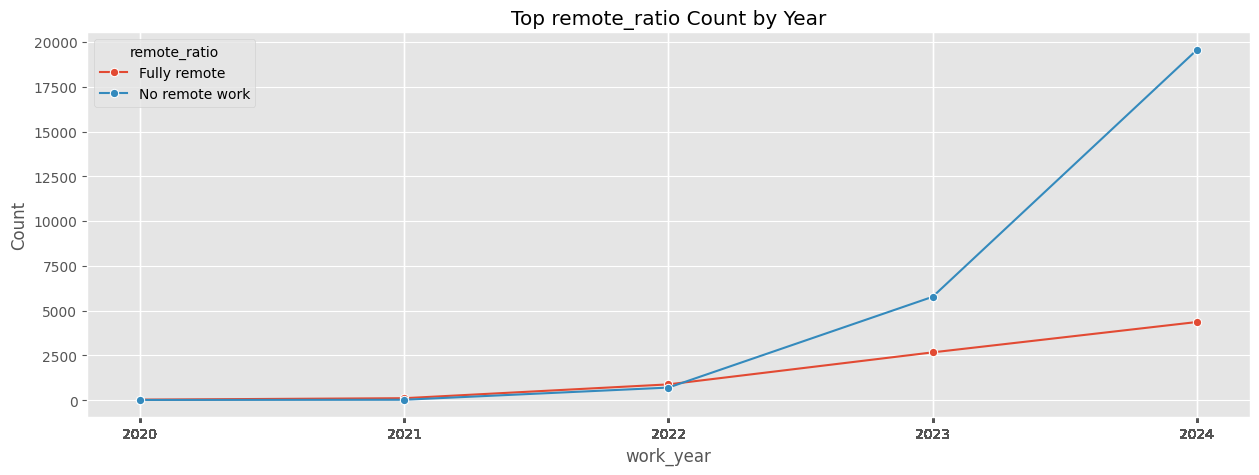

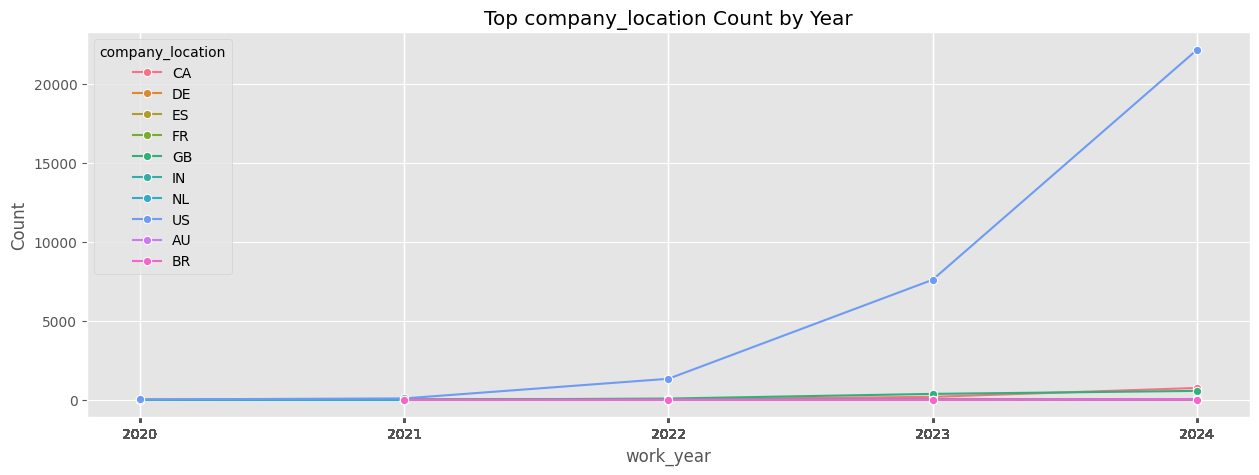

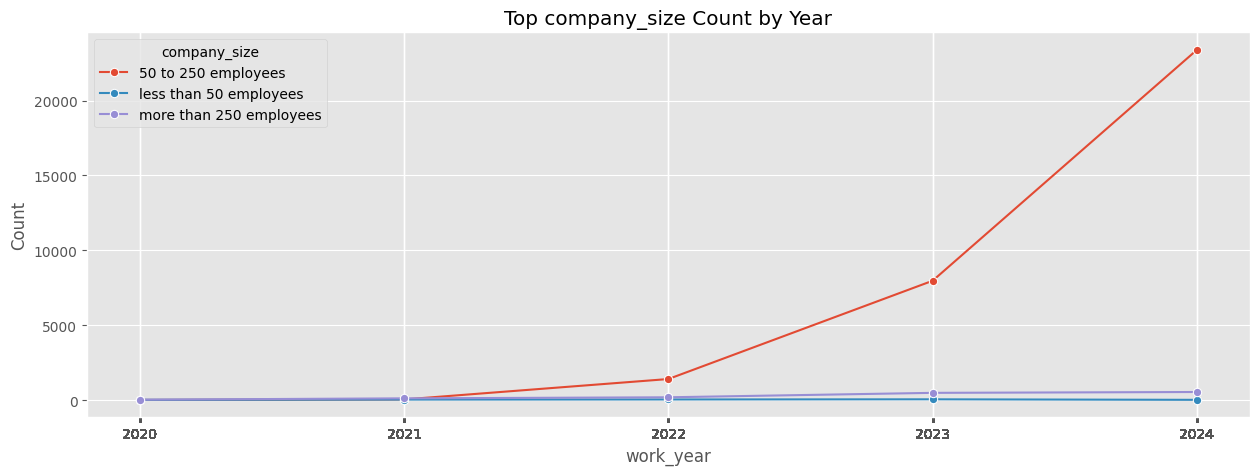

In [174]:
plt.style.use('ggplot')

for col in categorical_col:
    plt.figure(figsize=(15, 5))

    df_count = df.groupby(['work_year', col]).size().reset_index(name='count')
    #top_10 = df_count[col].value_counts().nlargest(10).index
    top_10 = df_count.groupby(col)['count'].sum().nlargest(10).index
    df_top_10 = df_count[df_count[col].isin(top_10)]
    sns.lineplot(data=df_top_10, x='work_year', y='count', hue=col, marker='o')
    plt.title(f'Top {col} Count by Year')
    plt.xlabel('work_year')
    plt.ylabel('Count')
    plt.xticks(ticks=df['work_year'])
    plt.show()

In [175]:
# Export to Excel
df.to_excel('global_ai_ml_data_science_salaries.xlsx', sheet_name='Data')